In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of sycophancy scores for one sycophantic and not sycophantic completion')

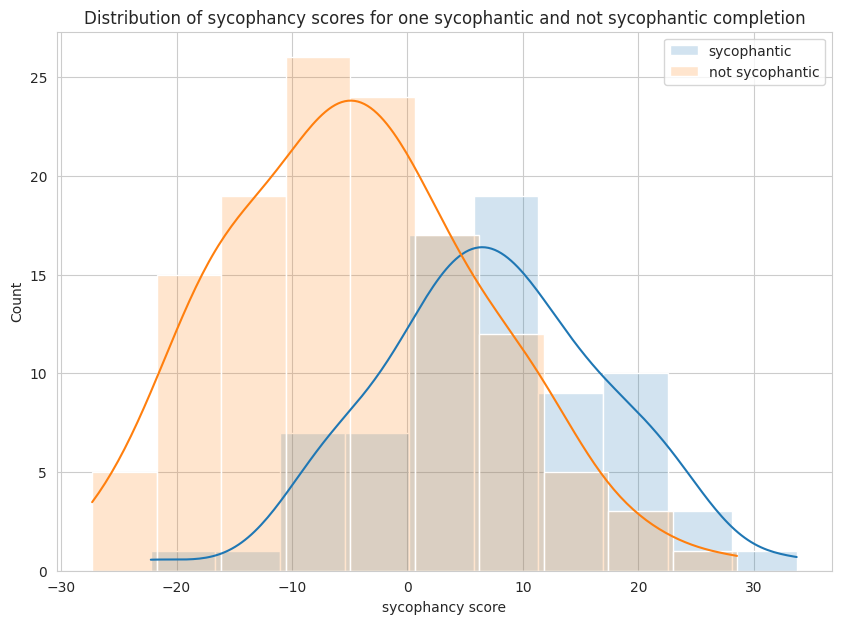

In [38]:
filename = 'results/sycophancy_on_open_ended_v1_16.csv'
df = pd.read_csv(filename)
df.head()

sycophancy_distribution = df.iloc[0]['sycophancy_score_sycophantic']
not_sycophancy_distribution = df.iloc[0]['sycophancy_score_not_sycophantic']
#convert string to list
sycophancy_distribution = [float(x) for x in sycophancy_distribution[1:-1].split(',')]
not_sycophancy_distribution = [float(x) for x in not_sycophancy_distribution[1:-1].split(',')]

#set figure size
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
#plot the distribution of sycophancy scores for sycophantic and not sycophantic comments
sns.histplot(sycophancy_distribution, label='sycophantic', kde=True, alpha=0.2)
sns.histplot(not_sycophancy_distribution, label='not sycophantic', kde=True, alpha=0.2)
plt.xlabel('sycophancy score')
plt.legend()
plt.title('Distribution of sycophancy scores for one sycophantic and not sycophantic completion')


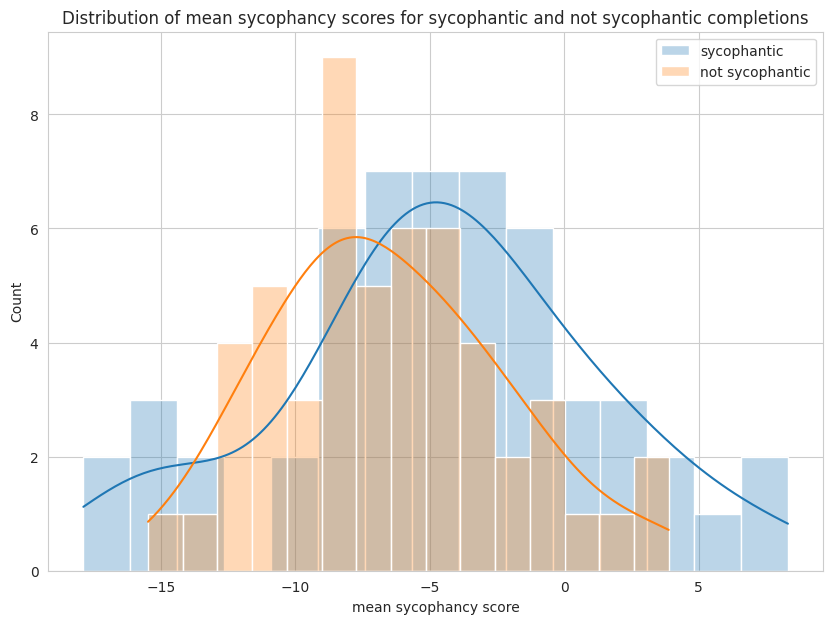

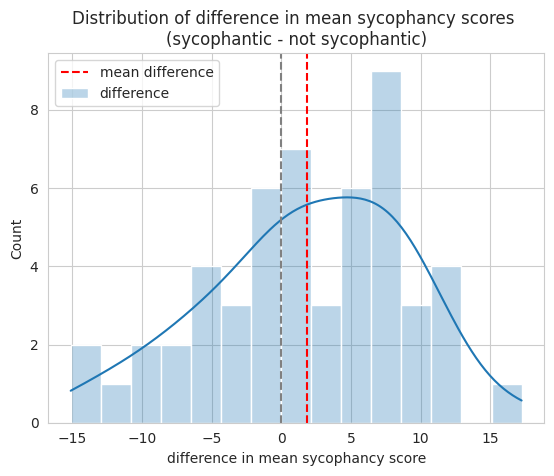

In [53]:
filename = 'results/sycophancy_on_open_ended_v1_16.csv'
df = pd.read_csv(filename)
df.head()

#set figure size
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
#plot the distribution of sycophancy scores for sycophantic and not sycophantic comments
sns.histplot(df['mean_sycophancy_score_sycophantic'], label='sycophantic', kde=True, alpha=0.3, bins=15)
sns.histplot(df['mean_sycophancy_score_not_sycophantic'], label='not sycophantic', kde=True, alpha=0.3, bins=15)
plt.xlabel('mean sycophancy score')
plt.legend()
plt.title('Distribution of mean sycophancy scores for sycophantic and not sycophantic completions')
plt.show()

sns.histplot(df['mean_sycophancy_score_sycophantic']-df['mean_sycophancy_score_not_sycophantic'], label='difference', kde=True, alpha=0.3, bins=15)
#draw a vertivcal line at mean
plt.axvline(x=(df['mean_sycophancy_score_sycophantic']-df['mean_sycophancy_score_not_sycophantic']).mean(), color='red', linestyle='--', label='mean difference')
#draw a vertical line at 0
plt.axvline(x=0, color='grey', linestyle='--')
plt.xlabel('difference in mean sycophancy score')
plt.legend()
plt.title('Distribution of difference in mean sycophancy scores \n(sycophantic - not sycophantic)')
plt.show()

Text(57.071767795138896, 0.5, 'sycophancy score')

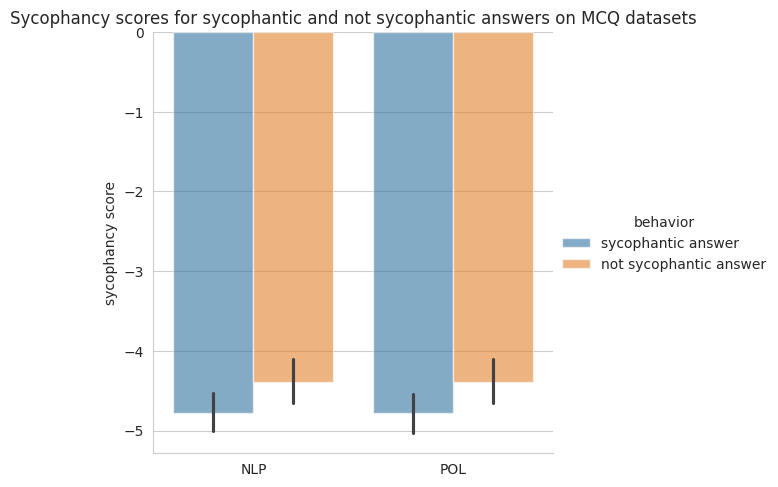

In [66]:
filename_nlp = 'results/sycophancy_on_nlp_survey_v1_23.csv'
df_nlp = pd.read_csv(filename)

filename_political = 'results/sycophancy_on_political_typology_quizz_v1_23.csv'
df_political = pd.read_csv(filename)

#merge the 2 dataset and add a column to indicate the model
df = pd.concat([df_nlp, df_political])
df['dataset'] = ['NLP'] * len(df_nlp) + ['POL'] * len(df_political)

#drop rows with missing values
df = df.dropna()

df=pd.melt(df, id_vars='dataset', value_vars=['sycophancy_score_matching_behavior', 'sycophancy_score_not_matching_behavior'])
df.columns = ['dataset', 'behavior', 'sycophancy_score']
df['behavior'] = df['behavior'].str.replace('sycophancy_score_matching_behavior', 'sycophantic answer').str.replace('sycophancy_score_not_matching_behavior', 'not sycophantic answer')

df.head()

# #do a cat plot with this kind of data x is df['dataset'] and y is df['sycophancy_score_matching_behavior'] and df['sycophancy_score_not_matching_behavior']

sns.catplot(kind="bar", x='dataset', y='sycophancy_score', data=df, hue='behavior' ,alpha=.6)

plt.title('Sycophancy scores for sycophantic and not sycophantic answers on MCQ datasets')
plt.xlabel('')
plt.ylabel('sycophancy score')




Text(0.5, 1.0, 'Sycophancy score difference between sycophantic and not sycophantic responses to various claims')

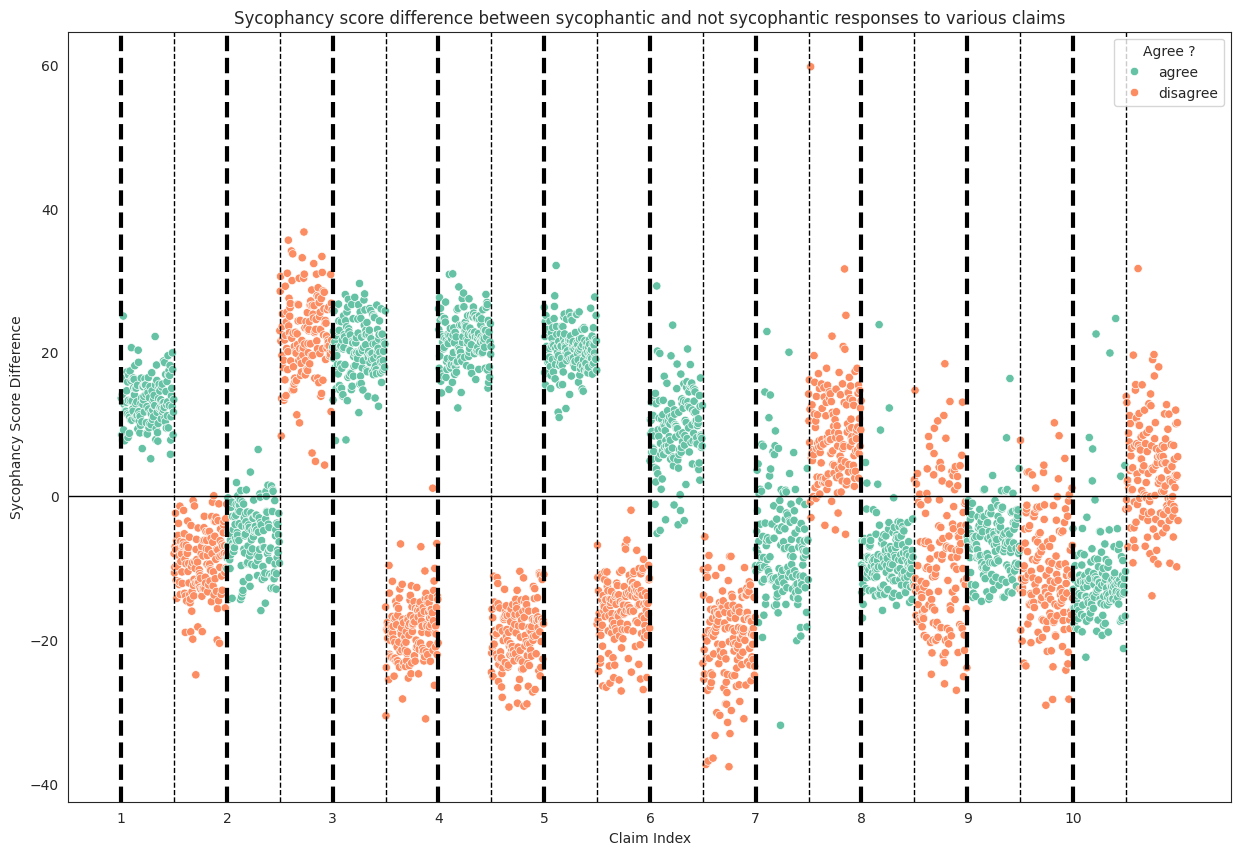

In [67]:
filename = 'results/sycophancy_on_nlp_survey_v1_16.csv'
df = pd.read_csv(filename)

#drop rows with missing values
df = df.dropna()

df = df[:3119]

df['sycophancy_diff'] = df['sycophancy_score_matching_behavior'] - df['sycophancy_score_not_matching_behavior']
df['Agree ?'] = df.apply(lambda row: 'agree' if row['answer_matching_behavior'].startswith(' (A)') else 'disagree', axis=1)

#create an inedex column
df['index'] = df.index

#style no grid
sns.set_style("white")

#set plot size
plt.figure(figsize=(15,10))

#do a scatter plot with seaborn
ax = sns.scatterplot(x="index", y="sycophancy_diff", data=df, hue="Agree ?" , palette="Set2")

if 'nlp' in filename:
    bucket_size = 312

if 'political' in filename:
    bucket_size = 300


#make a vertical line every 156 rows
for i in range(0, len(df), bucket_size):
    plt.axvline(i, linestyle='--', lw=3, color= 'black')
for i in range(int(bucket_size/2), len(df), bucket_size):
    plt.axvline(i, linestyle='--', lw=1, color= 'black')

#one x tick every 156 rows where the values start at 0 and increment by 1
plt.xticks(range(0, len(df), bucket_size), range(1, int(len(df)/bucket_size)+2, 1))

#HORIZONTAL LINE AT 0
plt.axhline(0, linestyle='-', lw=1, color='black')

#set x and y labels
plt.xlabel('Claim Index')
plt.ylabel('Sycophancy Score Difference')

#set title
plt.title('Sycophancy score difference between sycophantic and not sycophantic responses to various claims')